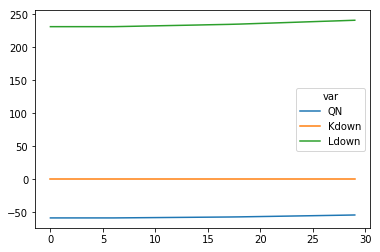

In [51]:
import SuPy.SuPy_module as sp
import os
import glob
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
# import collections
reload(sp)

# initialise SUEWS settings
dir_input = './Input'
dict_mod_cfg, dict_state_init = sp.init_SUEWS_dict(dir_input)

# load met forcing
filecode = dict_mod_cfg['filecode']
tstep = dict_state_init[1]['tstep']
list_file_MetForcing = glob.glob(os.path.join(
    dir_input, '{}*{}*txt'.format(filecode, tstep / 60)))
# load as DataFrame:
df_forcing = sp.load_SUEWS_MetForcing_df(list_file_MetForcing[0])
# load as dict (faster for simulation if performance is heavily concerned)
# dict_forcing = sp.load_SUEWS_MetForcing_dict(list_file_MetForcing[0])


# main calulation:
# compact form:
reload(sp)
dict_output, dict_state = sp.run_suews(
    df_forcing.iloc[:30].T.to_dict(), dict_state_init)


# post-processing:
# convert dict of raw output to easier DataFrame:
# {grid: Dataframe by group ({'SUEWS','ESTM','snow'})}
# df_output = sp.pack_df_output(dict_output)

df_output = sp.pack_df_output(dict_output)

# plot some variables
xx = df_output.loc[1, 'SUEWS'].loc[:, ['QN', 'Kdown', 'Ldown']].plot.line()
plt.show(xx)


In [65]:
reload(sp);

In [61]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [4]:
%lprun -f sp.load_SUEWS_MetForcing_df sp.load_SUEWS_MetForcing_df(list_file_MetForcing[0])

In [41]:
%lprun -f sp.run_suews sp.run_suews(df_forcing.iloc[:].T.to_dict(), dict_state_init)

In [66]:
%lprun -f sp.suews_cal_tstep sp.run_suews(df_forcing.iloc[:100].T.to_dict(), dict_state_init)

In [39]:
%lprun -f sp.pack_df_output_X sp.pack_df_output_X(dict_output)